In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from bq_helper import BigQueryHelper
import networkx as nx

# import plotting library
#%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [6]:
# Create helper object for the  the bigQuery data set
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"C:\Users\srish\Documents\NEU\Parallell ML and AI\Untitled Folder\json\My First Project-dd9334d0c0a8.json"

blockchain_helper = BigQueryHelper(active_project="bigquery-public-data",
                                            dataset_name="bitcoin_blockchain")

In [7]:
# inspect the structure
blockchain_helper.list_tables()
# look at a table of the information for both data sets

['blocks', 'transactions']

In [8]:
blockchain_helper.head('transactions')

,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1241693386000,b78dd4052c5c19ed15bff7f7cbc072cb87601680165412...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",000000006b6810ea2b71871065c31f0939c61bc73ca19e...,000000009f9639803e3a9424f210004c25c2c2e6a85836...,b78dd4052c5c19ed15bff7f7cbc072cb87601680165412...,3796474150,1,0,None
1,1261947871000,bfcb4467092290da3bee702d5ffedfe1933c36a18b0e77...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",000000003d0aa75d182618516bf64536d94119d23ef412...,00000000c1405320b87082391bd82155d88728dea85cd6...,bfcb4467092290da3bee702d5ffedfe1933c36a18b0e77...,296968200,1,0,None
2,1262072718000,a069017c031239357a6d325c7a10e6f4ed7cb722b1cb38...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",00000000b574d15c470a479874f19ea232b8b26e3ab742...,00000000adfab959a70c842627272d1ab2124d5ced5e2b...,a069017c031239357a6d325c7a10e6f4ed7cb722b1cb38...,132461744,1,0,None
3,1261474382000,9b9d3a70b70df897e2383fe16a09286502222f7ca06653...,[{'input_script_bytes': b'\x04\xff\xff\x00\x1d...,"[{'output_satoshis': 5000000000, 'output_scrip...",000000006224e9ce1dbe8a9b593d8f0485a19983b479bd...,00000000833508fb6be4b80e977e3eaa04994353b81cb3...,9b9d3a70b70df897e2383fe16a09286502222f7ca06653...,40052755,1,0,None
4,1277392209000,3fe2d7fa73e776f591e075783bc24cbd3e2fff8d444c72...,[{'input_script_bytes': b'\x04B1\r\x1c\x02\r\x...,"[{'output_satoshis': 5000000000, 'output_scrip...",0000000001ad7196de0396085a3fa95f2322722aa8b805...,000000000393cb2dc72fc296c66d9a19d2c01493e70c6d...,22d86d39b6d1226fbc372ce90f19e21c8b656ede4d8a8c...,90360458,1,0,None


In [9]:
blockchain_helper.head('blocks')

,block_id,previous_block,merkle_root,timestamp,difficultyTarget,nonce,version,work_terahash,work_error,transactions,row_number
0,00000000000000000069564d0540f7d160fc7400e03c49...,0000000000000000005b63800e8bcad3720bbd0eb1de31...,edfc723aef8cb890ebfe5e344cb0396537b9eb16e303d9...,1515102747000,402690497,2223520064,536870912,82942944770,None,[{'transaction_id': '85980bce0852cd0c5486e74aa...,1
1,000000000000000000022ab0c5740584d31006ddcd1e20...,0000000000000000003fa343696761c709280e6c1960b6...,62eaf6717a4191717a73ec967c965567a644e64c6bfa6d...,1515688646000,402690497,2356290042,536870912,82942944770,None,[{'transaction_id': '1d305ff7f7a0a20b244cb297a...,1
2,000000000000000001628d23a7ba194fe9498676960947...,0000000000000000035278f6b3cdfd504dbc12ba6aa73a...,a0ab99611a82b0f2607e0f15bece5f27ee653c0e28512d...,1467313104000,402997206,1278950744,536870912,8996081931,None,[{'transaction_id': 'f3cde7dae624d6161b932431e...,1
3,00000000000000000025a758640f78eff1fe5bc472ff03...,0000000000000000000107f869d927913c9fe461221718...,2ee63d3176e5134fd4c4fb56455605caa0f4264695bbc3...,1530414240000,389508950,2427958816,536870912,218080250643,None,[{'transaction_id': '20475c1b5ac108d74970897d1...,1
4,0000000000000000004769939c52cfa8e8f1585b580080...,0000000000000000000e9767d1752bc44982204fd41f21...,c39b13747bc53ca09a0bb85282f8bfb085c91f10178b95...,1520194941000,392009692,719080265,536870912,129168124477,None,[{'transaction_id': '9f6dc05dc669a0a47d93f3b57...,1


In [10]:
q_input = """
        WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    inputs.input_pubkey_base58 AS input_key,
                    outputs.output_pubkey_base58 AS output_key,
                    outputs.output_satoshis AS satoshis,
                    transaction_id AS trans_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
                    JOIN UNNEST (inputs) AS inputs
                    JOIN UNNEST (outputs) AS outputs
                WHERE inputs.input_pubkey_base58 = '1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx'
                    OR outputs.output_pubkey_base58 = '1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx'
            )
        SELECT input_key, output_key, satoshis, trans_id,
            EXTRACT(DATE FROM trans_time) AS date
        FROM time
        --ORDER BY date
        """
blockchain_helper.estimate_query_size(q_input)

85.4835140183568

In [11]:
q3 = blockchain_helper.query_to_pandas(q_input)
q3.head(10)

# make a datatime type transformation
q3['date'] = pd.to_datetime(q3.date)
q3 = q3.sort_values('date')
# convert satoshis to bitcoin
q3['bitcoin'] = q3['satoshis'].apply(lambda x: float(x/100000000))
print(q3.info())

# make any sending of bitcoin a negative value representing 'leaving' this wallet
q3['bitcoin_mod'] = q3['bitcoin']
q3.loc[q3['input_key'] == '1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx', 'bitcoin_mod'] = -q3['bitcoin_mod']
# sanity check...
q3.loc[q3['input_key'] == '1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1006 to 709
Data columns (total 6 columns):
input_key     1545 non-null object
output_key    1545 non-null object
satoshis      1545 non-null int64
trans_id      1545 non-null object
date          1545 non-null datetime64[ns]
bitcoin       1545 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 84.5+ KB
None


,input_key,output_key,satoshis,trans_id,date,bitcoin,bitcoin_mod
1216,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,25776684,5116eeaac0e9aee38df22fdaf84da0654004aea24f75b9...,2013-07-25,0.257767,-0.257767
1215,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,16quexR7v37UiT5BgPCfHU8zXnQNQy7Uxj,5173316,5116eeaac0e9aee38df22fdaf84da0654004aea24f75b9...,2013-07-25,0.051733,-0.051733
1119,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,1MPX124i8kiYAPLspx7FDrscafxSHatFar,3678161,d3258a98db72d981b0d668a7ec03deb4be859af45cd53d...,2013-07-31,0.036782,-0.036782
1120,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,22098523,d3258a98db72d981b0d668a7ec03deb4be859af45cd53d...,2013-07-31,0.220985,-0.220985
257,1PuVaCWwDK8VmFj4EN8e2EgxvDpjeyJmRx,19f7giu2QEscGYbPETFv7czTqVd8i4ZR8Z,3767656,ef8ac7f1e8a875fec33e0f9dfe78f1a1d30be77fdd64bc...,2013-08-01,0.037677,-0.037677


In [12]:
q3.info()
# how many unique addresses are included in this wallets transaction history?
q3['output_key'].nunique()
# how many transactions to the top 10 addresses?
# extreme value for the top address...
q3['output_key'].value_counts().nlargest(10)
# fold difference between the largest and second largest wallet transactions - 44X!
# what is the story behind this wallet...?
q3['output_key'].value_counts().nlargest(5).iloc[0] / q3['output_key'].value_counts().nlargest(5).iloc[1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 1006 to 709
Data columns (total 7 columns):
input_key      1545 non-null object
output_key     1545 non-null object
satoshis       1545 non-null int64
trans_id       1545 non-null object
date           1545 non-null datetime64[ns]
bitcoin        1545 non-null float64
bitcoin_mod    1545 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 136.6+ KB


6.545454545454546

In [13]:
# how many unique addresses are included in this wallets transaction history?
q3['input_key'].nunique()
# how many transactions to the top 10 addresses?
# extreme value for the top address...
q3['input_key'].value_counts().nlargest(10)
# fold difference between the largest and second largest wallet transactions - 44X!
# what is the story behind this wallet...?
q3['input_key'].value_counts().nlargest(5).iloc[0] / q3['input_key'].value_counts().nlargest(5).iloc[1]

101.16666666666667

C:\Users\srish\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Volume of Transactions Per Day')

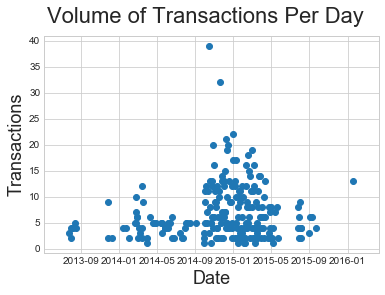

In [14]:
# we should look at transaction activity across time
q3_plot = q3['date'].value_counts()
q3_plot.head()
# plotting params
ax = plt.gca()
ax.scatter(q3_plot.index, q3_plot.values)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Transactions', fontsize=18)
plt.suptitle('Volume of Transactions Per Day', fontsize=22)
#ax.set_yscale('log')

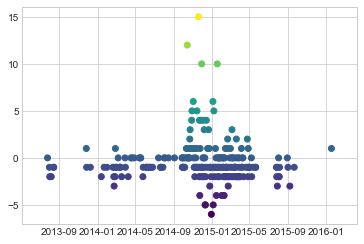

In [15]:
# daily difference in input transactions and output transactions
daily_diff = q3.groupby(['date'])['input_key', 'output_key'].nunique()
daily_diff['difference'] = daily_diff.input_key - daily_diff.output_key
plt.scatter(daily_diff.index, daily_diff.difference, c=daily_diff.difference, cmap='viridis')

In [16]:
# percentage of unique transactions out of total - the rest must be transactions to multiple addresses (don't really understand this...)
q3['trans_id'].nunique() / len(q3)
# there are multiple records of the same input to outout address recoreded with the same transaction ID
# why does this happen? is the total transferred bitcoin for a transaction being split up across several records?
len(q3.groupby(['trans_id', 'output_key']).nunique()) / len(q3)

0.6634304207119741

In [17]:
# lets group each individual transaction and the total amount of bitcoin sent / received and plot over time
trans_plot = q3.groupby(['date', 'trans_id'])['bitcoin'].sum()
trans_plot.head(10)

date        trans_id                                                        
2013-07-25  5116eeaac0e9aee38df22fdaf84da0654004aea24f75b934f841df93c24975b5    0.309500
            fb526a3b9bbe205387e52024b2174e99e3c2f16b329baabe7021d99bfdd11a07    0.310000
2013-07-31  d3258a98db72d981b0d668a7ec03deb4be859af45cd53d6e3b67e77113a0bda1    0.257767
2013-08-01  ba54359375fd17e11dd1566f1c676aea2bd6de3ec003d500b97225634150e65f    0.220485
            ef8ac7f1e8a875fec33e0f9dfe78f1a1d30be77fdd64bc674cc9b09b6100821b    0.191935
2013-08-06  2786c0a2110ae1b7567452d45aafc2565f3cfb7dafe0ca45e08e8dff005e9ed5    0.153758
            56ed6c6e0ba30884ae195d078bac13f8d51dbff6669b72b1d03be4a90fced203    0.042058
2013-08-13  7f9458d4b8c81060ce8f678688ca14afa62ed17939b617c1d86c41a98a40e8b0    0.120687
            8d8e77246120cd4a987aac821138791f851989c9743998feede906b53d9628ca    0.168224
            bea71abe4f7fddf0cad0e6b0e4d16da48abb24741d14a2be012af5b255a61576    0.167724
Name: bitcoin, dtype: float64

Text(0.5, 0.98, 'Net Bitcoin Transacted Per Day')

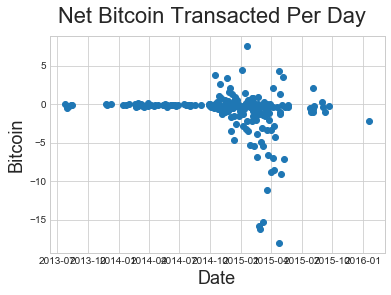

In [18]:
# lets plot the value of transactions over time from this wallet
q4_plot = q3.groupby('date', as_index=False)[['bitcoin_mod']].sum()
plt.plot_date(q4_plot['date'], q4_plot['bitcoin_mod'])
plt.ylabel('Bitcoin', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.suptitle('Net Bitcoin Transacted Per Day', fontsize=22)

Text(0.5, 1.0, 'Monthly Transaction Volume & Net Bitcoin Exchange')

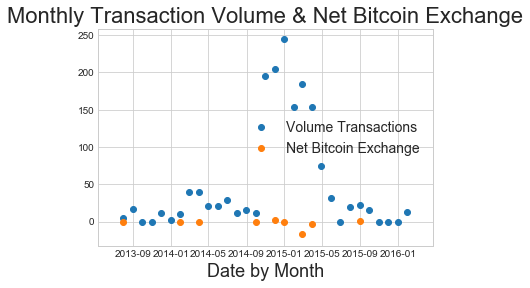

In [29]:
corr_plot = q3.groupby([q3['date'].dt.month]).sum().reset_index()
corr_plot = q3.set_index(pd.DatetimeIndex(q3['date'])).groupby(pd.Grouper(freq='M'))[['trans_id']].count()
corr_plot = corr_plot.join(value_plot)
corr_plot.head()
plt.scatter(corr_plot.index, corr_plot['trans_id'])
plt.scatter(corr_plot.index, corr_plot['bitcoin_mod'])
plt.legend(fontsize=14, labels=('Volume Transactions', 'Net Bitcoin Exchange'))
plt.xlabel('Date by Month', fontsize=18)
#plt.ylabel('Transactions', fontsize=18)
plt.title('Monthly Transaction Volume & Net Bitcoin Exchange', fontsize=22)

In [30]:
# look at a correlation matrix between transactions in a given month
# and net bitcoins transacted in a given month
fin_corr = pd.concat([value_plot, corr_plot], axis = 1)
fin_corr.corr()

,bitcoin_mod,trans_id,bitcoin_mod
bitcoin_mod,1.000000,-0.339083,1.000000
trans_id,-0.339083,1.000000,-0.339083
bitcoin_mod,1.000000,-0.339083,1.000000


In [ ]:
# top 20 wallets bitcoins sent out to
nx_plot_asc = q3.groupby(['input_key', 'output_key'], as_index=False)['bitcoin_mod'].sum().sort_values(by='bitcoin_mod', ascending=True)[0:20]
# top 20 wallets bitcoins received from
nx_plot_desc = q3.groupby(['input_key', 'output_key'], as_index=False)['bitcoin_mod'].sum().sort_values(by='bitcoin_mod', ascending=False)[0:20]
nx_plot = pd.concat([nx_plot_asc, nx_plot_desc], ignore_index=True)

# networkx graph of net volumne of bitcoins transacted (most into and most out of the wallet in question)
G = nx.from_pandas_edgelist(nx_plot, 'input_key', 'output_key', 'bitcoin_mod', nx.DiGraph())
# specify node color
color_list = []
for node in G.nodes():
    if node == '1NxaBCFQwejSZbQfWcYNwgqML5wWoE3rK4':
        color_list.append('red')
    else:
        color_list.append('green')
# plot
pos=nx.random_layout(G)
nx.draw_networkx_nodes(G,pos, node_list= G.nodes(),node_color=color_list,node_size=100)
nx.draw_networkx_edges(G, pos)
#nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Net Volume Bitcoins Exchanged', fontsize=22)